In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../sample_data/cleaned_labelled_sample_data.csv')

In [3]:
df.head()

,INCOME,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,PERSONALASSETS,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,...,NUMBERSOURCEOFFUNDS,COMMITMENTAMOUNT,INCOMEQUALIFIED,PERSONALQUALIFIED,FINANCIALQUALIFIED,REDFLAGS_ONEQUALIFIER,REDFLAGS_ALLQUALIFIER,REDFLAGS_INCOMEQUALIFIER,REDFLAGS_PERSONALQUALIFIER,REDFLAGS_FINANCIALQUALIFIER
0,619630.541086,126607.201904,493648.927712,-625.588530,1371661.2,427180.0,652896.4,500214.0,35,False,...,3,1.506898e+06,True,False,True,1.0,7.0,3.0,1.0,3.0
1,640483.491986,253214.403808,297899.298598,89369.789581,369993.0,869518.0,44096.0,989404.0,34,False,...,3,3.775701e+05,True,False,False,1.0,3.0,2.0,1.0,0.0
2,312794.263533,297899.298598,14969.439754,-74.474819,543896.6,551200.0,63801.4,591988.8,31,False,...,3,6.370112e+05,True,False,False,1.0,6.0,3.0,1.0,2.0
3,350031.675856,342584.193388,7596.432114,-148.949647,824044.0,490568.0,8268.0,490568.0,35,False,...,2,9.700267e+05,True,False,False,2.0,8.0,4.0,2.0,4.0
4,403653.549601,402164.053100,14.894965,1474.601537,1026334.4,757900.0,161226.0,835068.0,33,False,...,2,3.794484e+05,True,False,False,3.0,5.0,4.0,3.0,2.0


In [4]:
df = df.dropna()
df.shape


(457, 21)

In [5]:
cluster_df = pd.read_csv('../sample_data/clustered_sample.csv')
cluster_df.shape

(457, 41)

In [6]:
cluster_counts = cluster_df['Cluster'].value_counts()
cluster_counts

Cluster
0    231
1     80
2     55
5     47
3     34
8      3
6      3
4      2
7      2
Name: count, dtype: int64

In [7]:
df['CLUSTER'] = cluster_df['Cluster']

In [8]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
# df = df.drop(columns=['INCOMEQUALIFIED', 'PERSONALQUALIFIED', 'FINANCIALQUALIFIED'])

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_15227/1422378134.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [9]:
reduced_df = df.copy()
# reduced_df['NONFINANCIALASSETS'] = reduced_df['PERSONALASSETS'] - reduced_df['FINANCIALASSETS']
# reduced_df = reduced_df.drop(columns=['INCOME', 'PERSONALASSETS'])
reduced_df 

,INCOME,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,PERSONALASSETS,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,...,COMMITMENTAMOUNT,INCOMEQUALIFIED,PERSONALQUALIFIED,FINANCIALQUALIFIED,REDFLAGS_ONEQUALIFIER,REDFLAGS_ALLQUALIFIER,REDFLAGS_INCOMEQUALIFIER,REDFLAGS_PERSONALQUALIFIER,REDFLAGS_FINANCIALQUALIFIER,CLUSTER
0,619630.541086,126607.201904,493648.927712,-625.588530,1371661.2,427180.0,652896.4,500214.0,35,0,...,1.506898e+06,1,0,1,1.0,7.0,3.0,1.0,3.0,5
1,640483.491986,253214.403808,297899.298598,89369.789581,369993.0,869518.0,44096.0,989404.0,34,0,...,3.775701e+05,1,0,0,1.0,3.0,2.0,1.0,0.0,5
2,312794.263533,297899.298598,14969.439754,-74.474819,543896.6,551200.0,63801.4,591988.8,31,0,...,6.370112e+05,1,0,0,1.0,6.0,3.0,1.0,2.0,0
3,350031.675856,342584.193388,7596.432114,-148.949647,824044.0,490568.0,8268.0,490568.0,35,0,...,9.700267e+05,1,0,0,2.0,8.0,4.0,2.0,4.0,2
4,403653.549601,402164.053100,14.894965,1474.601537,1026334.4,757900.0,161226.0,835068.0,33,0,...,3.794484e+05,1,0,0,3.0,5.0,4.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,120649.215931,68516.838678,53621.873748,-1489.496494,14185545.4,826800.0,551200.0,13599895.4,81,1,...,1.700933e+06,0,1,0,5.0,6.0,5.0,3.0,2.0,5
453,114691.229960,134054.684368,-18022.907562,-1340.546846,2380081.6,1929200.0,113960.6,2235116.0,84,0,...,8.799843e+05,0,1,0,7.0,8.0,7.0,5.0,4.0,0
454,159033.540555,151586.058088,6702.734218,744.748249,2247793.6,1171300.0,44647.2,2028140.4,84,0,...,1.127183e+06,0,1,0,7.0,10.0,7.0,5.0,6.0,0
455,66133.644289,28896.231964,37058.672746,178.739578,4361921.2,1515800.0,739986.0,3553035.2,76,0,...,3.817063e+06,0,1,0,6.0,10.0,6.0,4.0,6.0,5


In [10]:
# TODO: Get price range of commitment amount for Azalea's products
commitment_amount_max = 10000000
commitment_amount_min = 100000

mean_commitment = (commitment_amount_max + commitment_amount_min) / 2
std_dev_commitment = (commitment_amount_max - commitment_amount_min) / 6  # Assuming 99.7% data within range

reduced_df['COMMITMENTAMOUNT'] = np.random.normal(loc=mean_commitment, scale=std_dev_commitment, size=len(df))
reduced_df['COMMITMENTAMOUNT'] = reduced_df['COMMITMENTAMOUNT'].clip(lower=commitment_amount_min, upper=commitment_amount_max)


In [11]:
reduced_df.head()

,INCOME,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,PERSONALASSETS,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,...,COMMITMENTAMOUNT,INCOMEQUALIFIED,PERSONALQUALIFIED,FINANCIALQUALIFIED,REDFLAGS_ONEQUALIFIER,REDFLAGS_ALLQUALIFIER,REDFLAGS_INCOMEQUALIFIER,REDFLAGS_PERSONALQUALIFIER,REDFLAGS_FINANCIALQUALIFIER,CLUSTER
0,619630.541086,126607.201904,493648.927712,-625.588530,1371661.2,427180.0,652896.4,500214.0,35,0,...,4.680442e+06,1,0,1,1.0,7.0,3.0,1.0,3.0,5
1,640483.491986,253214.403808,297899.298598,89369.789581,369993.0,869518.0,44096.0,989404.0,34,0,...,3.805289e+06,1,0,0,1.0,3.0,2.0,1.0,0.0,5
2,312794.263533,297899.298598,14969.439754,-74.474819,543896.6,551200.0,63801.4,591988.8,31,0,...,5.874331e+06,1,0,0,1.0,6.0,3.0,1.0,2.0,0
3,350031.675856,342584.193388,7596.432114,-148.949647,824044.0,490568.0,8268.0,490568.0,35,0,...,1.464433e+06,1,0,0,2.0,8.0,4.0,2.0,4.0,2
4,403653.549601,402164.053100,14.894965,1474.601537,1026334.4,757900.0,161226.0,835068.0,33,0,...,5.046514e+06,1,0,0,3.0,5.0,4.0,3.0,2.0,0


In [12]:
shared_columns = ['AGE', 'HASLPA', 'HASCRITICALILLNESS', 'NUMBERSOURCEOFFUNDS', 'COMMITMENTAMOUNT']

In [13]:
income_df = reduced_df[['FIXEDINCOME', 'VARIABLEINCOME', 'OTHERINCOME', 'REDFLAGS_INCOMEQUALIFIER'] + shared_columns]
personal_df = reduced_df[['INCOME', 'LIQUIDASSETS', 'PERSONALASSETS', 'RESIDENCEVALUE', 'REDFLAGS_PERSONALQUALIFIER'] + shared_columns]
financial_df = reduced_df[['INCOME', 'FINANCIALASSETS', 'REDFLAGS_FINANCIALQUALIFIER'] + shared_columns]

In [14]:
result_df = reduced_df.copy()

In [15]:
from sample_modelling import ModelManager

print(income_df.head())

X = income_df.drop(columns=['REDFLAGS_INCOMEQUALIFIER'])
y = income_df['REDFLAGS_INCOMEQUALIFIER']

model_manager = ModelManager(X, y)
X_train, X_test, y_train, y_test = model_manager.run_preprocessing()

y_train, predictions_train, y_test, predictions_test = model_manager.run_regression_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['LRPREDICTION_INCOME'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_randomforest_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['RFPREDICTION_INCOME'] = all_predictions

     FIXEDINCOME  VARIABLEINCOME   OTHERINCOME  REDFLAGS_INCOMEQUALIFIER  AGE  \
0  126607.201904   493648.927712   -625.588530                       3.0   35   
1  253214.403808   297899.298598  89369.789581                       2.0   34   
2  297899.298598    14969.439754    -74.474819                       3.0   31   
3  342584.193388     7596.432114   -148.949647                       4.0   35   
4  402164.053100       14.894965   1474.601537                       4.0   33   

   HASLPA  HASCRITICALILLNESS  NUMBERSOURCEOFFUNDS  COMMITMENTAMOUNT  
0       0                   0                    3      4.680442e+06  
1       0                   0                    3      3.805289e+06  
2       0                   0                    3      5.874331e+06  
3       0                   0                    2      1.464433e+06  
4       0                   1                    2      5.046514e+06  
                               OLS Regression Results                               
De

In [16]:
from sample_modelling import ModelManager

print(financial_df.head())

X = financial_df.drop(columns=['REDFLAGS_FINANCIALQUALIFIER'])
y = financial_df['REDFLAGS_FINANCIALQUALIFIER']

model_manager = ModelManager(X, y)
X_train, X_test, y_train, y_test = model_manager.run_preprocessing()

y_train, predictions_train, y_test, predictions_test = model_manager.run_regression_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['LRPREDICTION_FINANCIAL'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_randomforest_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['RFPREDICTION_FINANCIAL'] = all_predictions

          INCOME  FINANCIALASSETS  REDFLAGS_FINANCIALQUALIFIER  AGE  HASLPA  \
0  619630.541086         500214.0                          3.0   35       0   
1  640483.491986         989404.0                          0.0   34       0   
2  312794.263533         591988.8                          2.0   31       0   
3  350031.675856         490568.0                          4.0   35       0   
4  403653.549601         835068.0                          2.0   33       0   

   HASCRITICALILLNESS  NUMBERSOURCEOFFUNDS  COMMITMENTAMOUNT  
0                   0                    3      4.680442e+06  
1                   0                    3      3.805289e+06  
2                   0                    3      5.874331e+06  
3                   0                    2      1.464433e+06  
4                   1                    2      5.046514e+06  
                                 OLS Regression Results                                
Dep. Variable:     REDFLAGS_FINANCIALQUALIFIER   R-squared:

In [17]:
from sample_modelling import ModelManager

print(personal_df.head())

X = personal_df.drop(columns=['REDFLAGS_PERSONALQUALIFIER'])
y = personal_df['REDFLAGS_PERSONALQUALIFIER']

model_manager = ModelManager(X, y)
X_train, X_test, y_train, y_test = model_manager.run_preprocessing()

y_train, predictions_train, y_test, predictions_test = model_manager.run_regression_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['LRPREDICTION_PERSONAL'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_randomforest_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['RFPREDICTION_PERSONAL'] = all_predictions

          INCOME  LIQUIDASSETS  PERSONALASSETS  RESIDENCEVALUE  \
0  619630.541086      652896.4       1371661.2        427180.0   
1  640483.491986       44096.0        369993.0        869518.0   
2  312794.263533       63801.4        543896.6        551200.0   
3  350031.675856        8268.0        824044.0        490568.0   
4  403653.549601      161226.0       1026334.4        757900.0   

   REDFLAGS_PERSONALQUALIFIER  AGE  HASLPA  HASCRITICALILLNESS  \
0                         1.0   35       0                   0   
1                         1.0   34       0                   0   
2                         1.0   31       0                   0   
3                         2.0   35       0                   0   
4                         3.0   33       0                   1   

   NUMBERSOURCEOFFUNDS  COMMITMENTAMOUNT  
0                    3      4.680442e+06  
1                    3      3.805289e+06  
2                    3      5.874331e+06  
3                    2      1.4644

In [22]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   INCOME                       457 non-null    float64
 1   FIXEDINCOME                  457 non-null    float64
 2   VARIABLEINCOME               457 non-null    float64
 3   OTHERINCOME                  457 non-null    float64
 4   PERSONALASSETS               457 non-null    float64
 5   RESIDENCEVALUE               457 non-null    float64
 6   LIQUIDASSETS                 457 non-null    float64
 7   FINANCIALASSETS              457 non-null    float64
 8   AGE                          457 non-null    int64  
 9   HASLPA                       457 non-null    int64  
 10  HASCRITICALILLNESS           457 non-null    int64  
 11  NUMBERSOURCEOFFUNDS          457 non-null    int64  
 12  COMMITMENTAMOUNT             457 non-null    float64
 13  INCOMEQUALIFIED     

In [33]:
result_df['REDFLAGS_AGGREGATEQUALIFIER'] = ((result_df['REDFLAGS_INCOMEQUALIFIER'] + result_df['REDFLAGS_FINANCIALQUALIFIER'] + result_df['REDFLAGS_PERSONALQUALIFIER']) / 3).round().astype(int)
result_df['REDFLAGS_MAXQUALIFIER'] = result_df[['REDFLAGS_INCOMEQUALIFIER', 'REDFLAGS_FINANCIALQUALIFIER', 'REDFLAGS_PERSONALQUALIFIER']].max(axis=1)
result_df['REDFLAGS_MINQUALIFIER'] = result_df[['REDFLAGS_INCOMEQUALIFIER', 'REDFLAGS_FINANCIALQUALIFIER', 'REDFLAGS_PERSONALQUALIFIER']].min(axis=1)

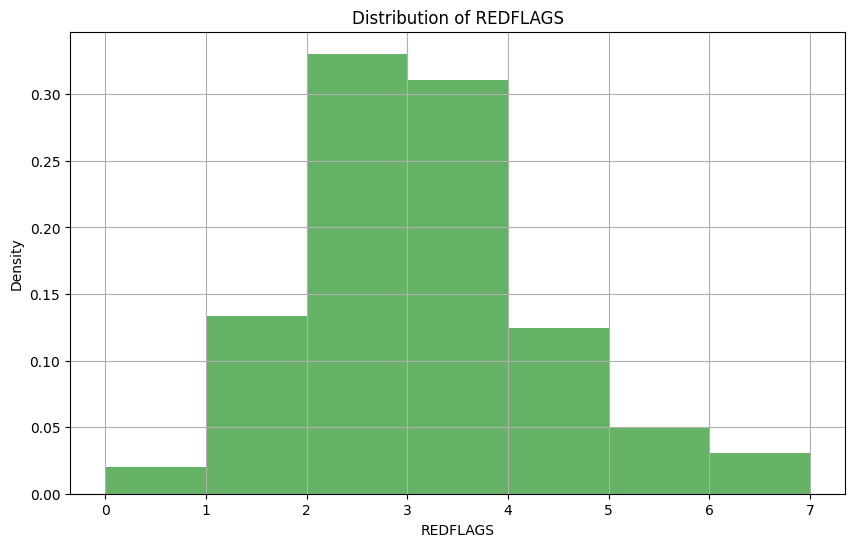

In [34]:
import matplotlib.pyplot as plt

# Plot the distribution of the REDFLAGS column
plt.figure(figsize=(10, 6))
bins = sorted(result_df['REDFLAGS_AGGREGATEQUALIFIER'].unique())
plt.hist(result_df['REDFLAGS_AGGREGATEQUALIFIER'], bins=bins, alpha=0.6, color='g', density=True)
plt.title('Distribution of REDFLAGS')
plt.xlabel('REDFLAGS')
plt.ylabel('Density')
plt.xticks(np.arange(min(bins), max(bins) + 1, 1))

plt.grid(True)
plt.show()


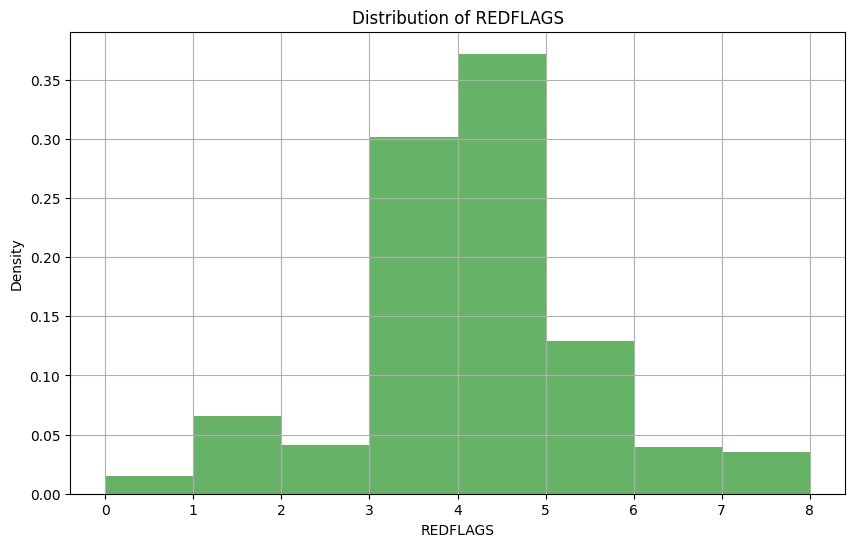

In [32]:
import matplotlib.pyplot as plt

# Plot the distribution of the REDFLAGS column
plt.figure(figsize=(10, 6))
bins = sorted(result_df['REDFLAGS_MAXQUALIFIER'].unique())
plt.hist(result_df['REDFLAGS_MAXQUALIFIER'], bins=bins, alpha=0.6, color='g', density=True)
plt.title('Distribution of REDFLAGS')
plt.xlabel('REDFLAGS')
plt.ylabel('Density')
plt.xticks(np.arange(min(bins), max(bins) + 1, 1))

plt.grid(True)
plt.show()


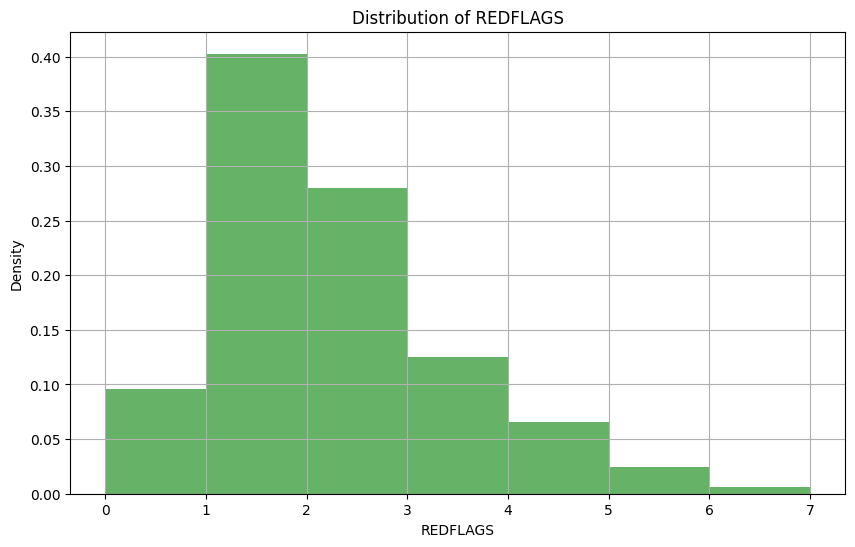

In [35]:
import matplotlib.pyplot as plt

# Plot the distribution of the REDFLAGS column
plt.figure(figsize=(10, 6))
bins = sorted(result_df['REDFLAGS_MINQUALIFIER'].unique())
plt.hist(result_df['REDFLAGS_MINQUALIFIER'], bins=bins, alpha=0.6, color='g', density=True)
plt.title('Distribution of REDFLAGS')
plt.xlabel('REDFLAGS')
plt.ylabel('Density')
plt.xticks(np.arange(min(bins), max(bins) + 1, 1))

plt.grid(True)
plt.show()


In [36]:
result_df.to_csv('./data_reference/result_predictions.csv', index=False)

In [37]:
result_df = pd.read_csv('./data_reference/result_predictions.csv')
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   INCOME                       457 non-null    float64
 1   FIXEDINCOME                  457 non-null    float64
 2   VARIABLEINCOME               457 non-null    float64
 3   OTHERINCOME                  457 non-null    float64
 4   PERSONALASSETS               457 non-null    float64
 5   RESIDENCEVALUE               457 non-null    float64
 6   LIQUIDASSETS                 457 non-null    float64
 7   FINANCIALASSETS              457 non-null    float64
 8   AGE                          457 non-null    int64  
 9   HASLPA                       457 non-null    int64  
 10  HASCRITICALILLNESS           457 non-null    int64  
 11  NUMBERSOURCEOFFUNDS          457 non-null    int64  
 12  COMMITMENTAMOUNT             457 non-null    float64
 13  INCOMEQUALIFIED     

In [38]:
def label_risk_from_red_flags(red_flag_number):
    if red_flag_number < 3:
        return "Low Risk"
    elif red_flag_number < 6:
        return "Moderate Risk"
    elif red_flag_number < 9:
        return "High Risk"
    else:
        return "Very High Risk"

In [44]:
result_df['RISK_ONEQUALIFIER'] = result_df['REDFLAGS_ONEQUALIFIER'].apply(lambda x: label_risk_from_red_flags(x))
result_df['RISK_AGGREGATEQUALIFIER'] = result_df['REDFLAGS_AGGREGATEQUALIFIER'].apply(lambda x: label_risk_from_red_flags(x))
result_df['RISK_ALLQUALIFIER'] = result_df['REDFLAGS_ALLQUALIFIER'].apply(lambda x: label_risk_from_red_flags(x))

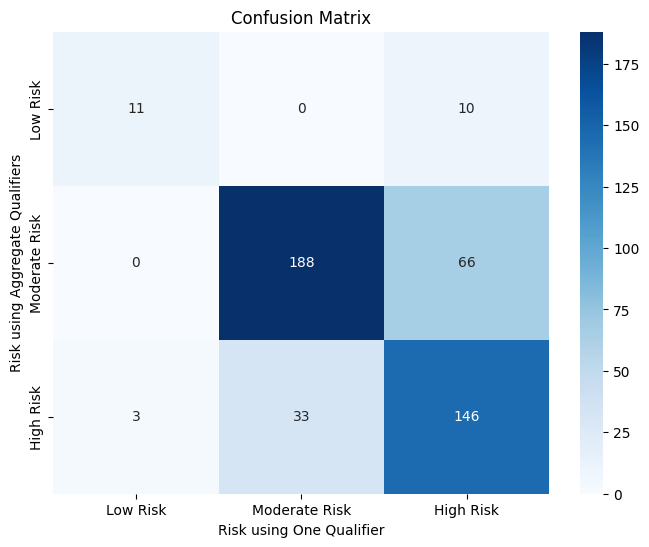

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(result_df['RISK_ONEQUALIFIER'], result_df['RISK_AGGREGATEQUALIFIER'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=result_df['RISK_ONEQUALIFIER'].unique(), yticklabels=result_df['RISK_AGGREGATEQUALIFIER'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Risk using One Qualifier')
plt.ylabel('Risk using Aggregate Qualifiers')
plt.show()

Concordance = 345 / 457 (75.5%)

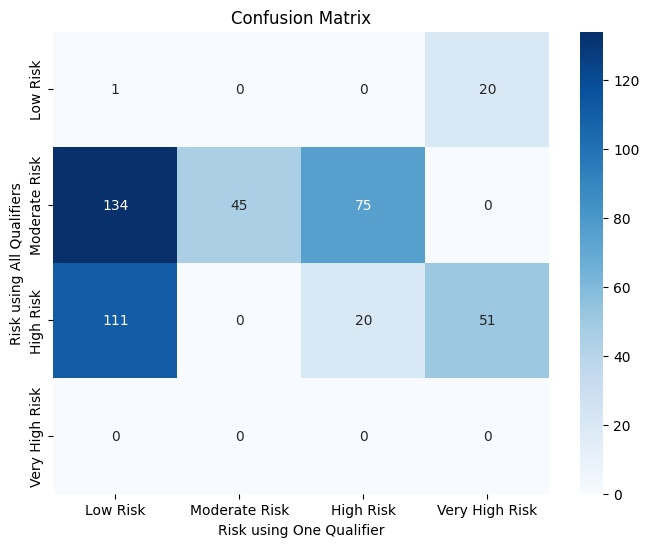

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(result_df['RISK_ONEQUALIFIER'], result_df['RISK_ALLQUALIFIER'])

# Ensure the labels on each side follow the same order
unique_labels = ['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Risk using One Qualifier')
plt.ylabel('Risk using All Qualifiers')
plt.show()

Concordance: 66 / 457 (14.4%)

In [48]:
66 / 457

0.14442013129102846